In [1]:
#!pip install cufflinks

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
import plotly.offline

cf.go_offline()
cf.set_config_file(offline=True, world_readable=False)

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df = df.drop("id", axis=1)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [8]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [10]:
df.stroke.value_counts(normalize=True).iplot(kind="bar")

In [11]:
cat_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", 
            "smoking_status"]

num_cols = ["age", "avg_glucose_level", "bmi"]

In [12]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())
    print()

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

hypertension
0    4612
1     498
Name: hypertension, dtype: int64

heart_disease
0    4834
1     276
Name: heart_disease, dtype: int64

ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



In [13]:
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='Count'>

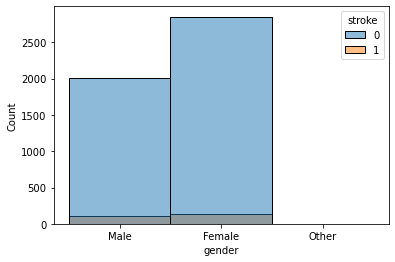

In [14]:
sns.histplot(data=df, x="gender", hue="stroke")

In [15]:
df.stroke.value_counts().iplot(kind="bar")

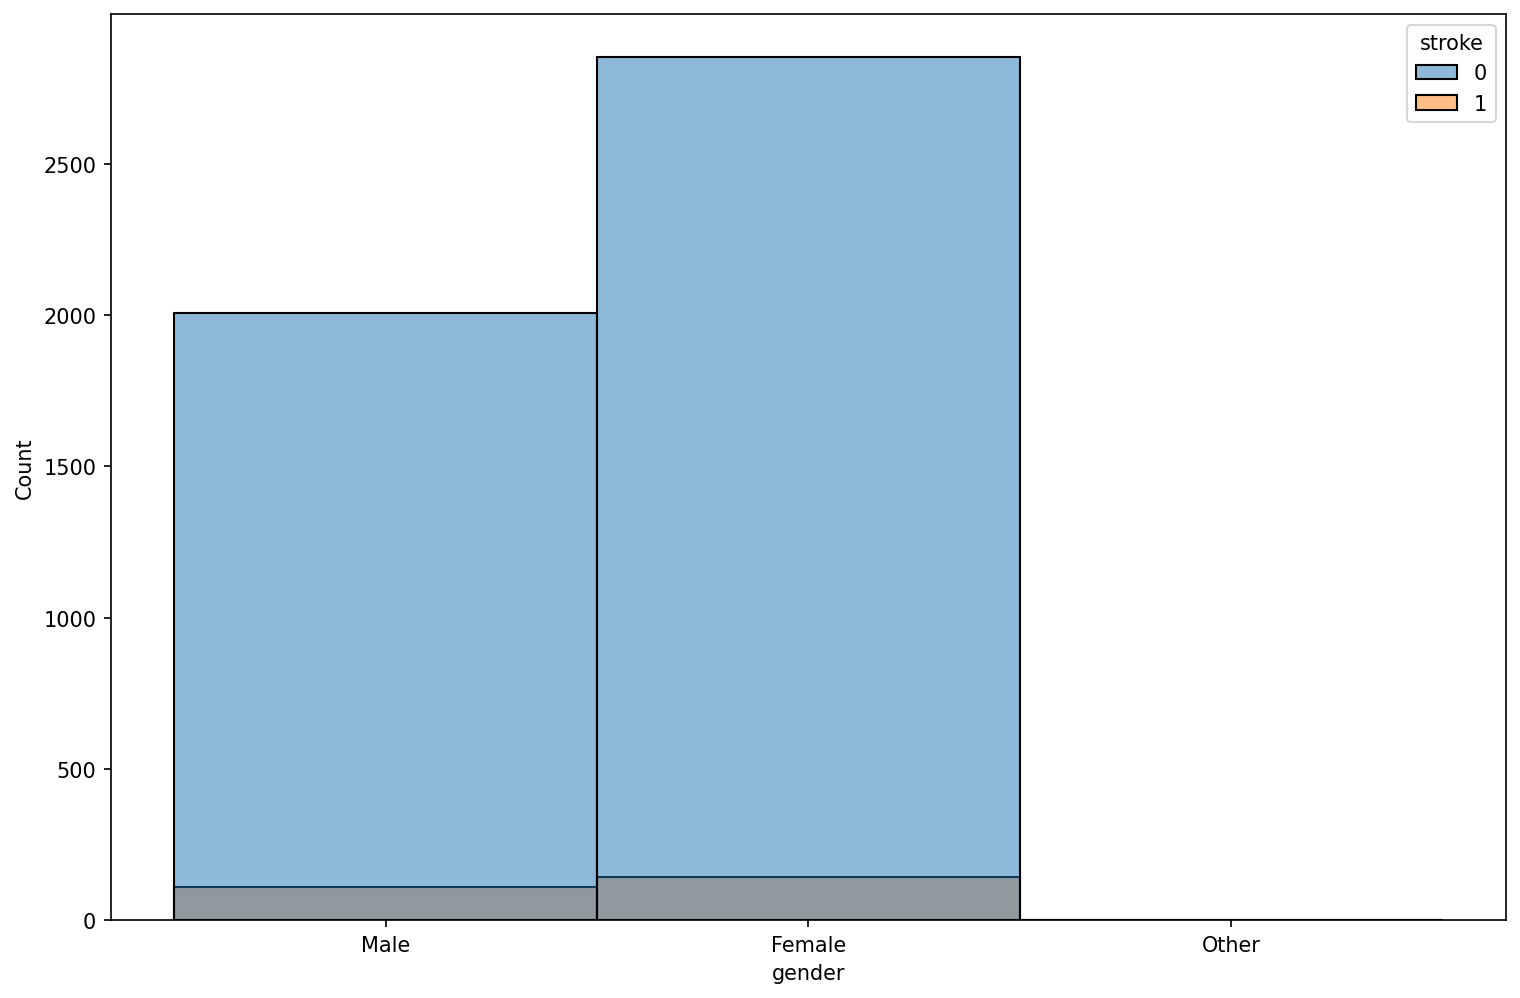

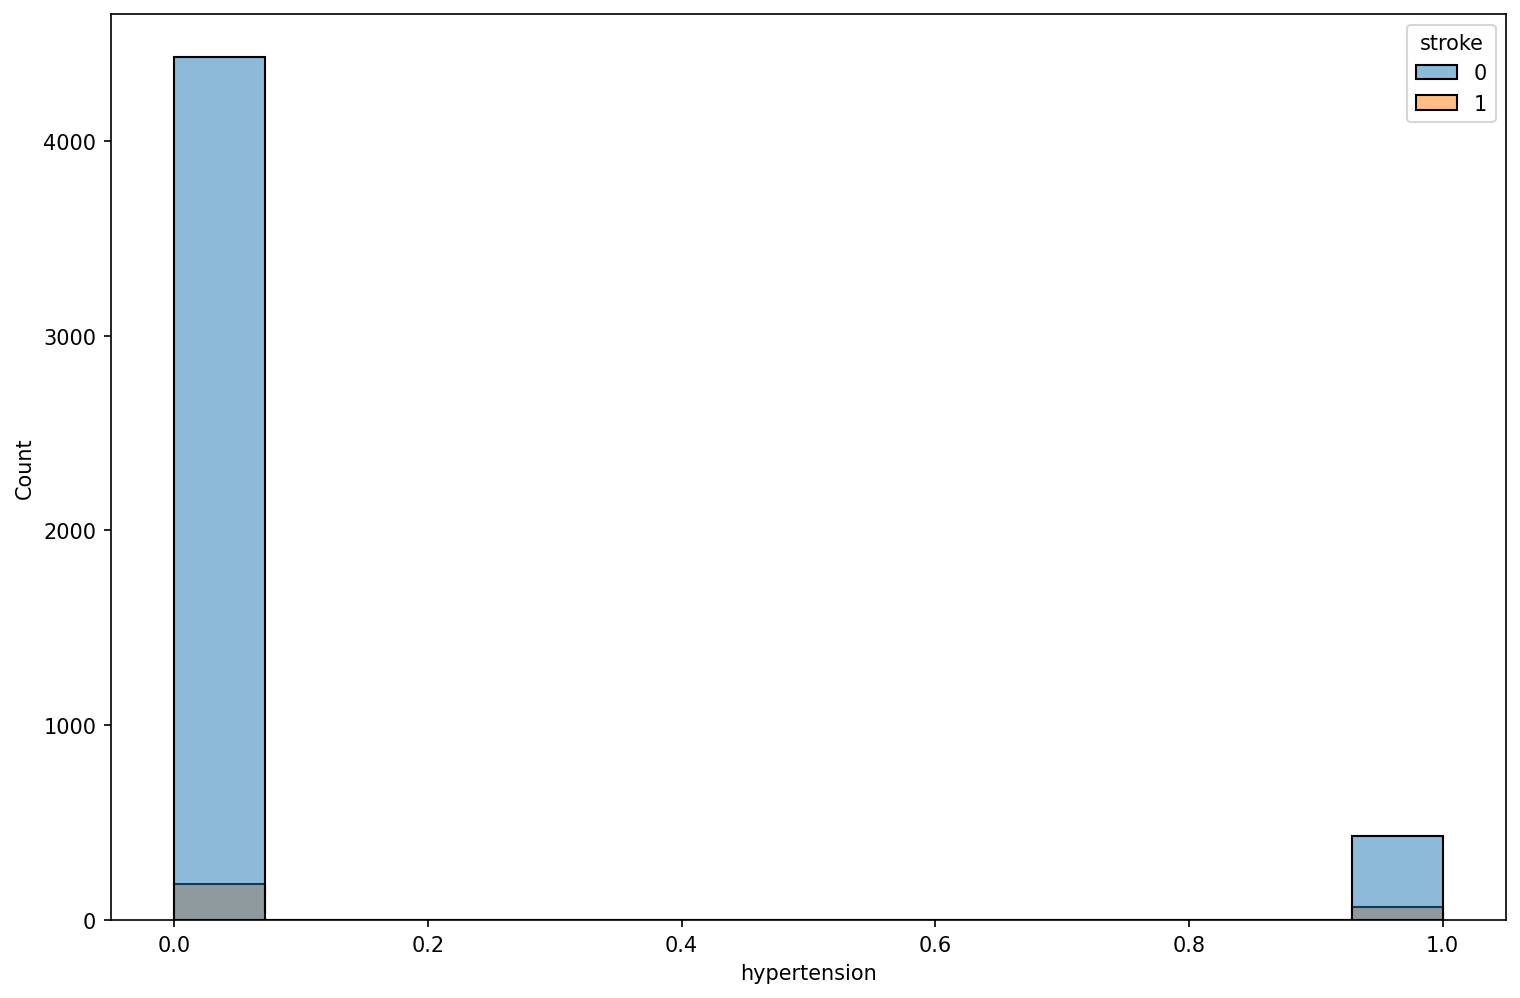

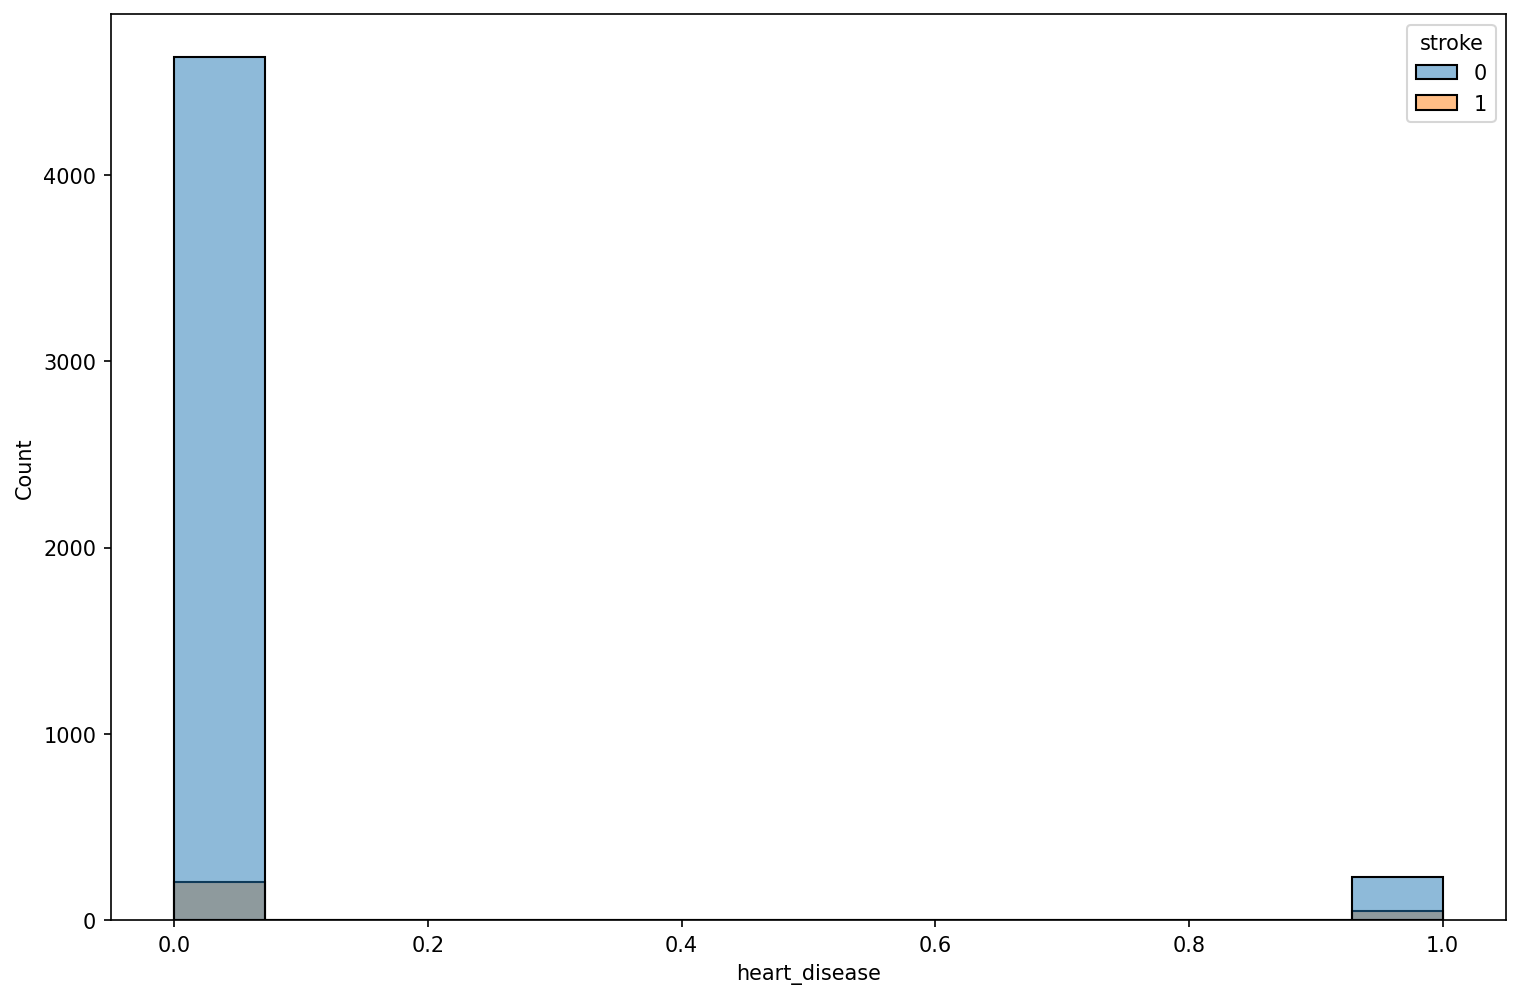

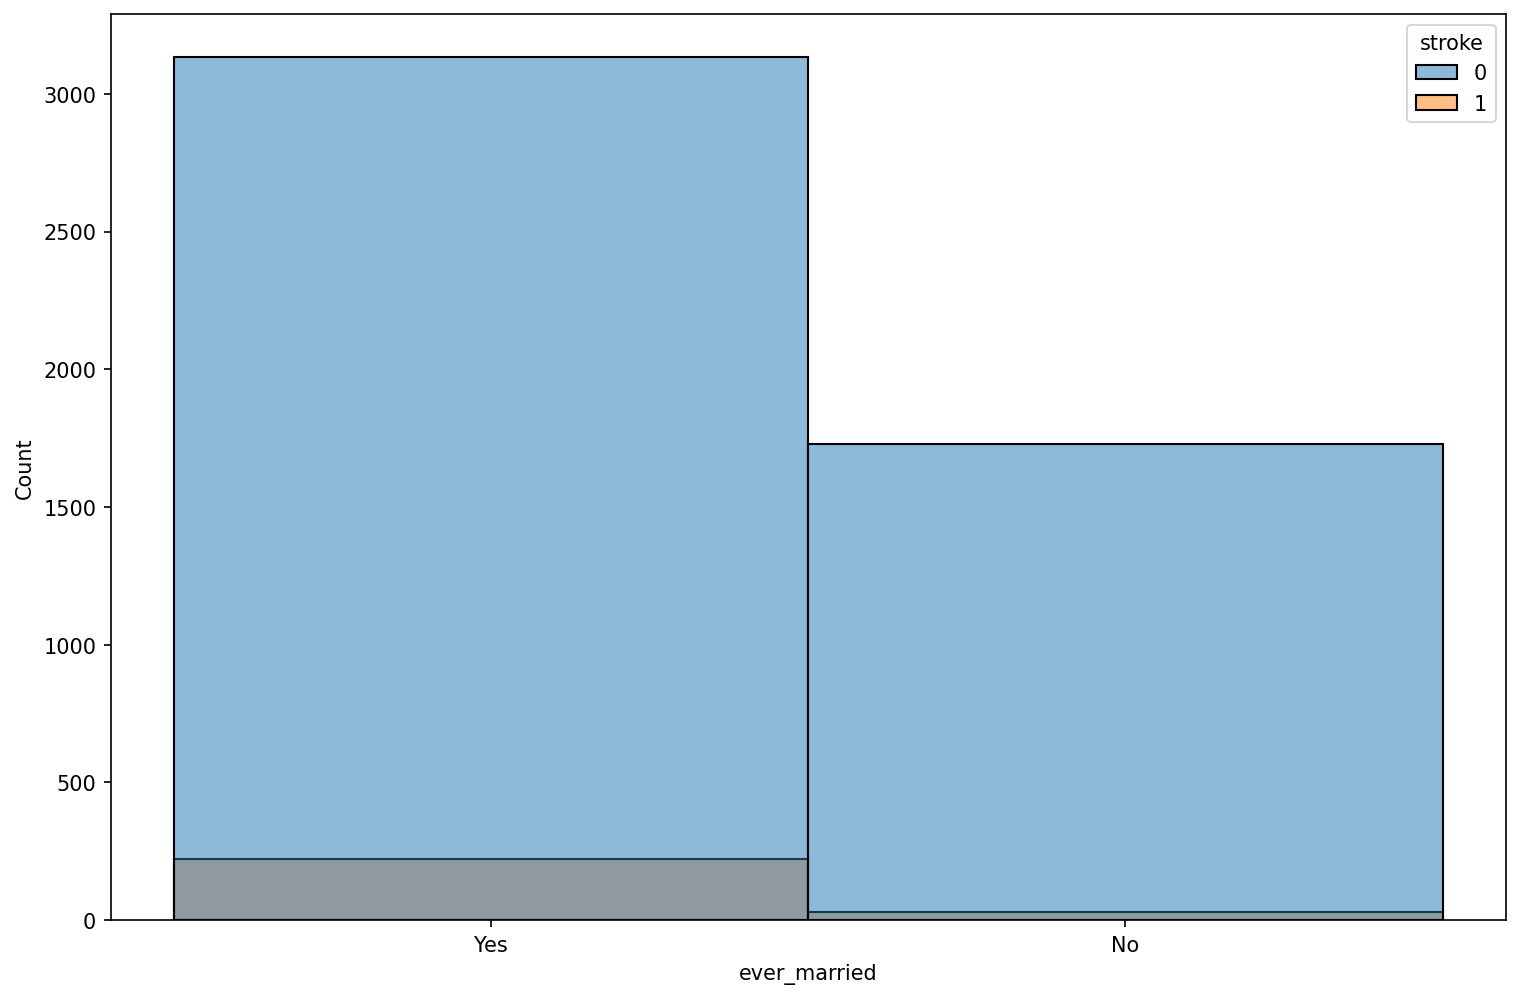

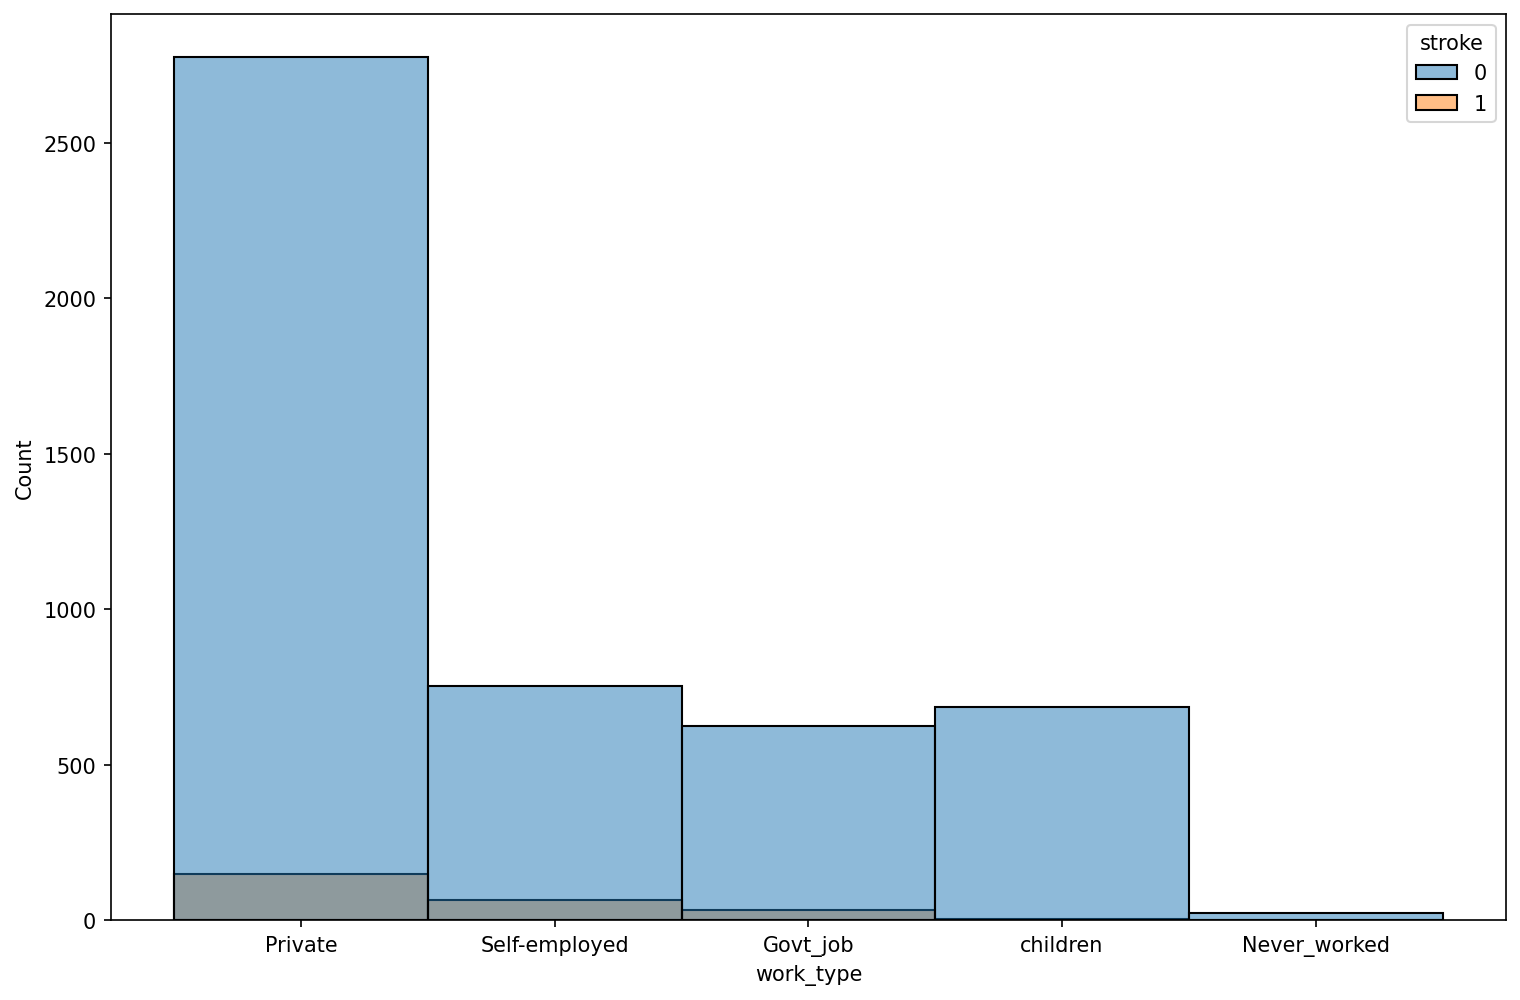

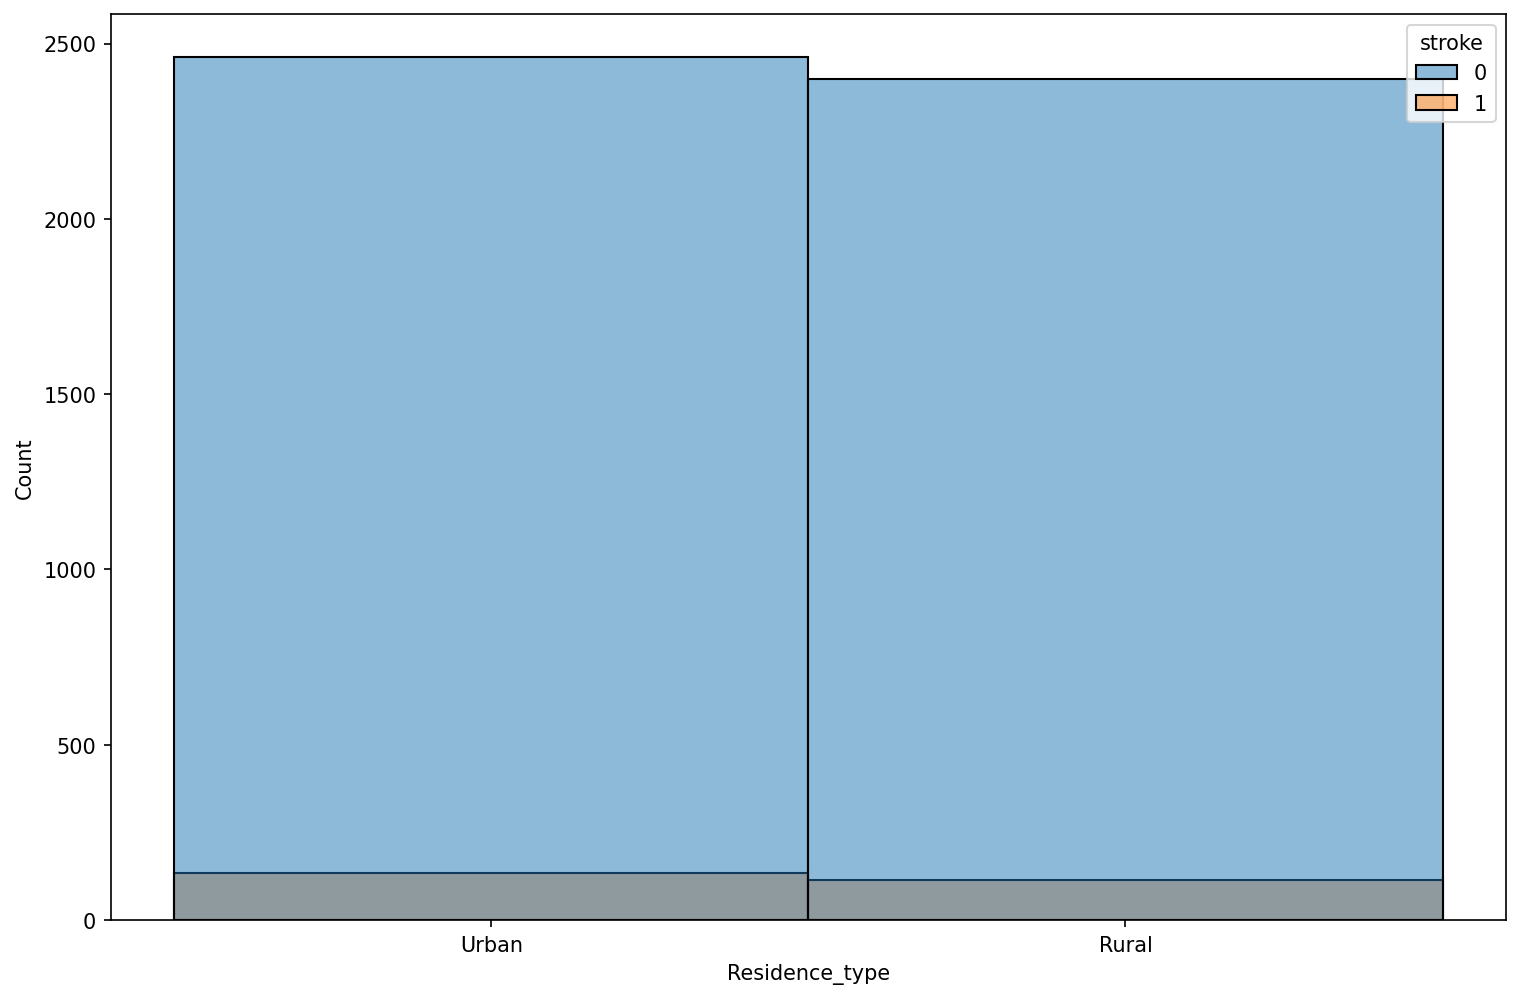

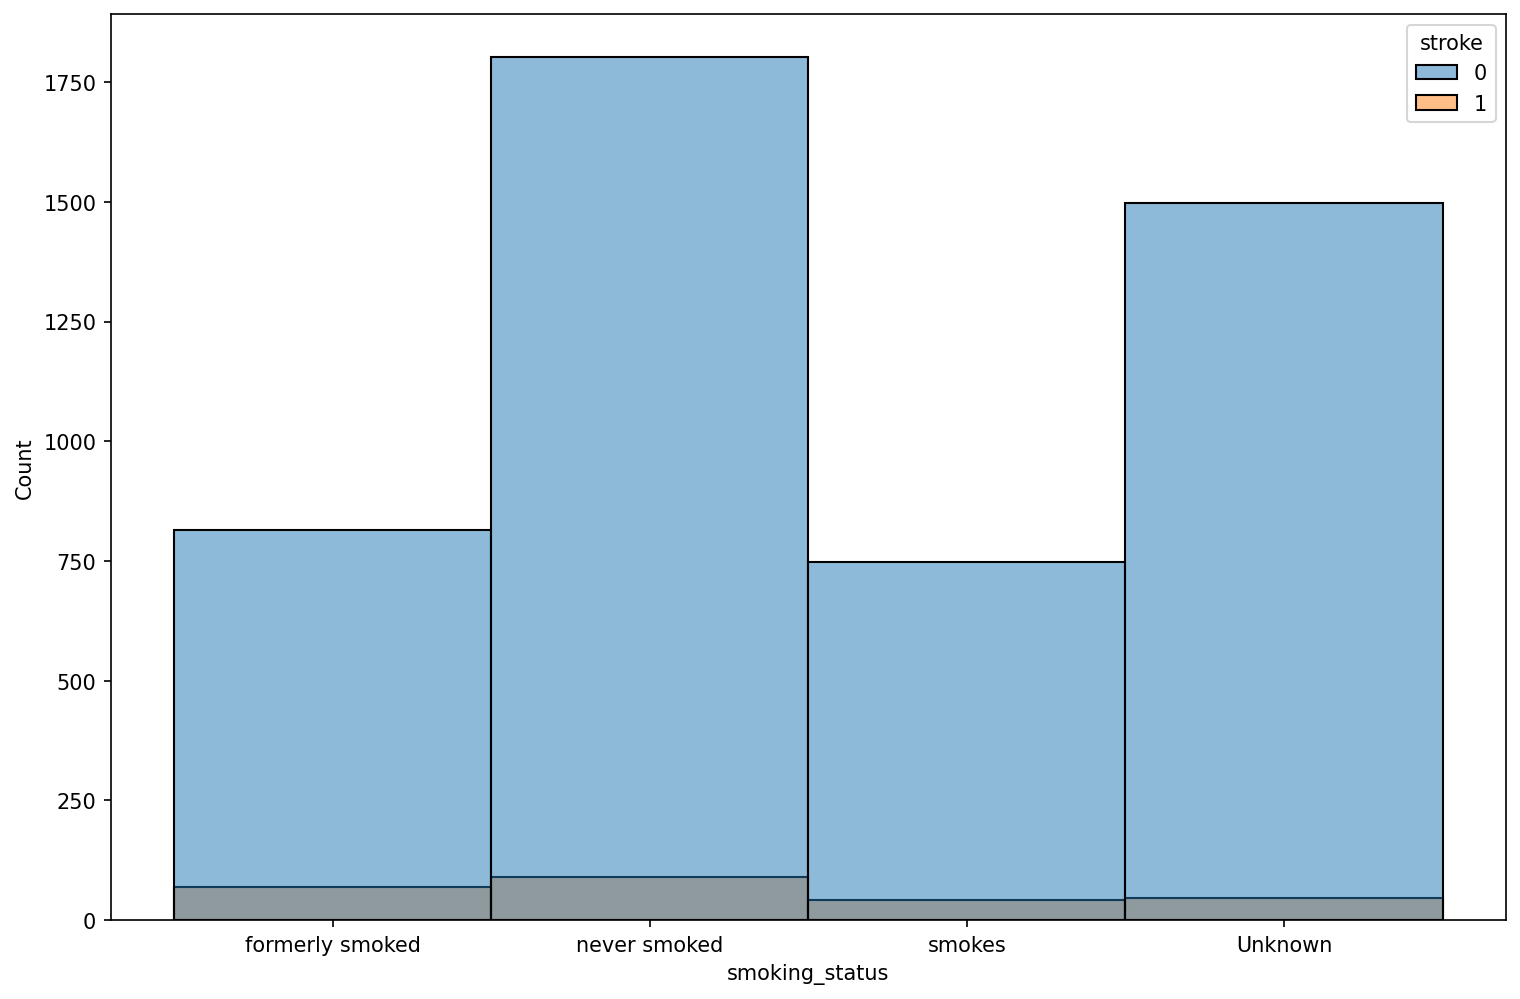

In [16]:
for i in cat_cols:
    plt.figure(figsize=(12,8), dpi=150)
    sns.histplot(data=df, x=i, hue="stroke")
    print()

<AxesSubplot:>

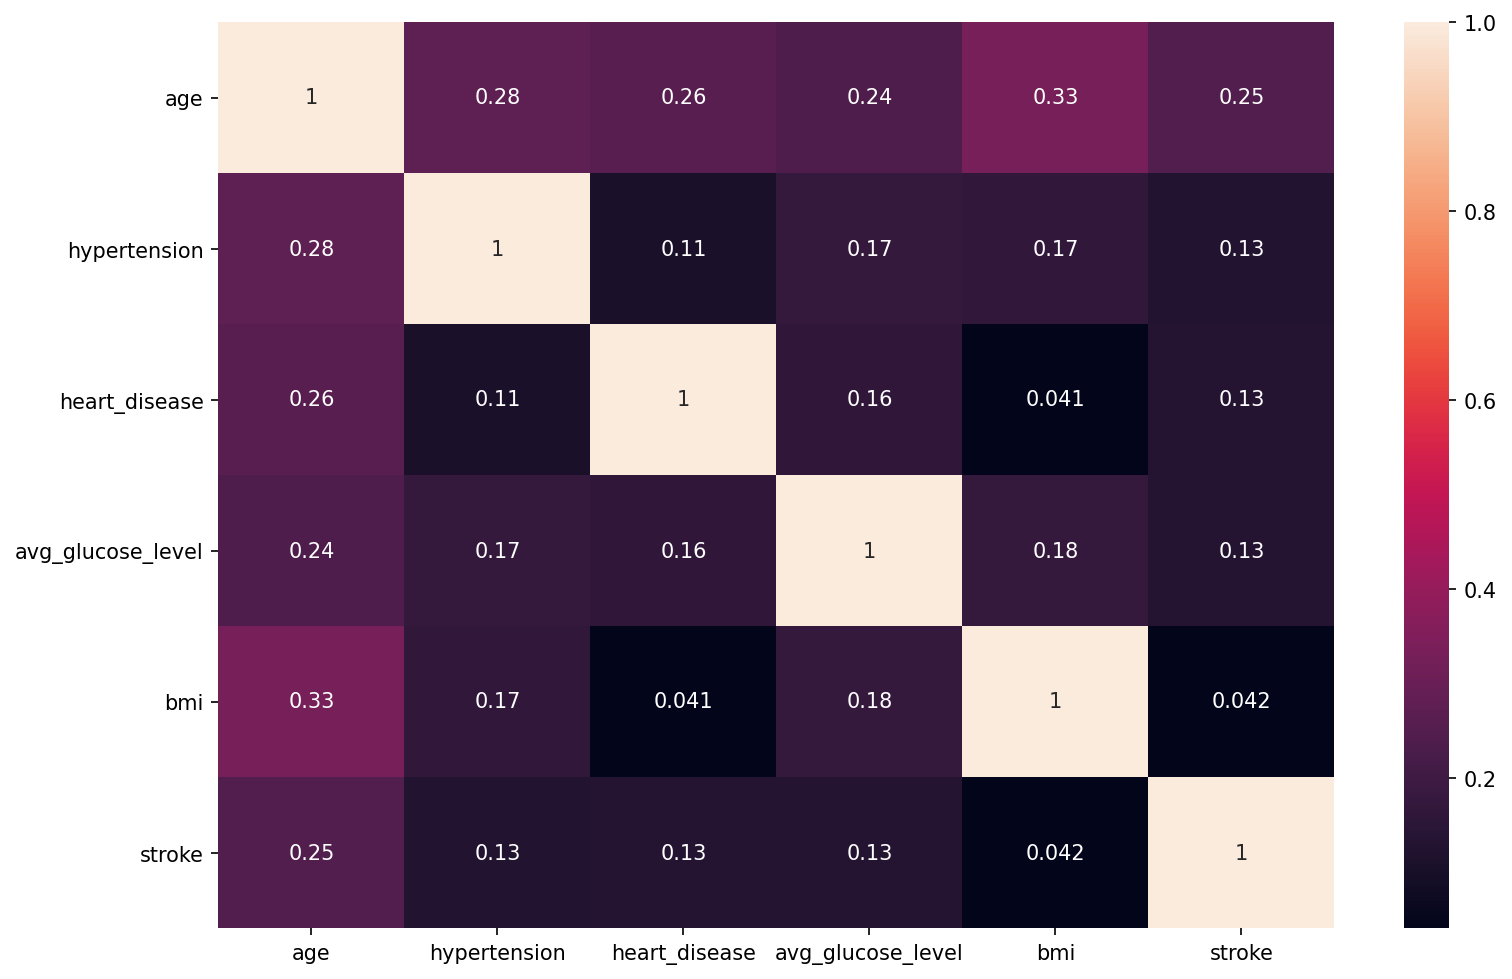

In [17]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df.corr(), annot=True)

In [18]:
df = df.drop(df[df["gender"]=="Other"].index)

In [19]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])

In [20]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,Elderly
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesity,Elderly
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Ideal,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,NaN,Elderly
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Obesity,Elderly
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Obesity,Adults
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Overweight,Mid Adults


# Recall and F1 score is our metric.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df2 = pd.get_dummies(df)

In [23]:
df2.shape

(5109, 30)

In [24]:
X = df2.drop(columns=["age","stroke", "bmi"])
y = df2.stroke

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
operations = [("impute", SimpleImputer(strategy="most_frequent")),
              ("scaler", MinMaxScaler()), ("model", LogisticRegression(class_weight = "balanced"))]

In [31]:
pipe_model = Pipeline(steps=operations)

In [32]:
pipe_model.fit(X_train, y_train)

C:\Users\bp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('scaler', MinMaxScaler()),
                ('model', LogisticRegression(class_weight='balanced'))])

In [33]:
y_pred = pipe_model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1021  423]
 [  19   70]]
              precision    recall  f1-score   support

           0       0.98      0.71      0.82      1444
           1       0.14      0.79      0.24        89

    accuracy                           0.71      1533
   macro avg       0.56      0.75      0.53      1533
weighted avg       0.93      0.71      0.79      1533



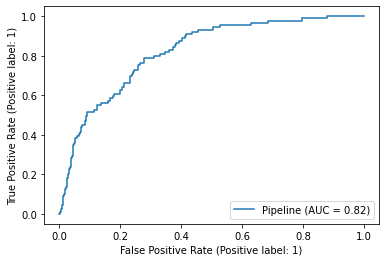

In [36]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipe_model, X_test, y_test);

# Second Model

In [37]:
df3 = pd.get_dummies(df.drop(columns=["bmi_cat", "age_cat"]))

In [38]:
df3.shape

(5109, 21)

In [39]:
X = df3.drop(columns="stroke")
y = df3.stroke

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
operations = [("impute", SimpleImputer(strategy="median")),
              ("scaler", MinMaxScaler()), ("model", LogisticRegression(class_weight = "balanced"))]

In [42]:
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1066  378]
 [  24   65]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      1444
           1       0.15      0.73      0.24        89

    accuracy                           0.74      1533
   macro avg       0.56      0.73      0.54      1533
weighted avg       0.93      0.74      0.81      1533



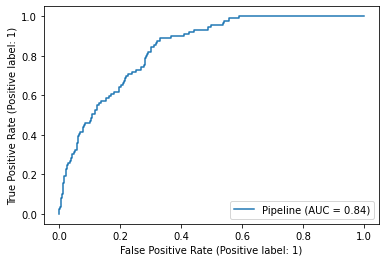

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipe_model, X_test, y_test);

# KNN (cat)

In [44]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,Elderly
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesity,Elderly
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Ideal,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,NaN,Elderly
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,Obesity,Elderly
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,Obesity,Adults
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,Overweight,Mid Adults


In [45]:
df4 = pd.get_dummies(df)

In [46]:
X = df4.drop(columns=["age","stroke", "bmi"])
y = df4.stroke

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
operations = [("impute", SimpleImputer(strategy="median")),
              ("scaler", MinMaxScaler()), ("model", KNeighborsClassifier(n_neighbors=1))]

In [50]:
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)
y_pred = pipe_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1444
           1       0.19      0.11      0.14        89

    accuracy                           0.92      1533
   macro avg       0.57      0.54      0.55      1533
weighted avg       0.90      0.92      0.91      1533

